In [1]:
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from cmdstanpy import CmdStanModel


F, L = len("Artur"), len("Mzyk")

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Excercise 1 - Generated Quantities Block

In [2]:
gen_quant = CmdStanModel(stan_file="home/code_1.stan")

INFO:cmdstanpy:compiling stan file /home/code_1.stan to exe file /home/code_1
INFO:cmdstanpy:compiled model executable: /home/code_1
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/code_1.hpp /home/code_1.stan
Warning in '/home/code_1.stan', line 7, column 4: Declaration of arrays by
    placing brackets after a variable name is deprecated and will be removed
    in Stan 2.32.0. Instead use the array keyword before the type. This can
    be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wn

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


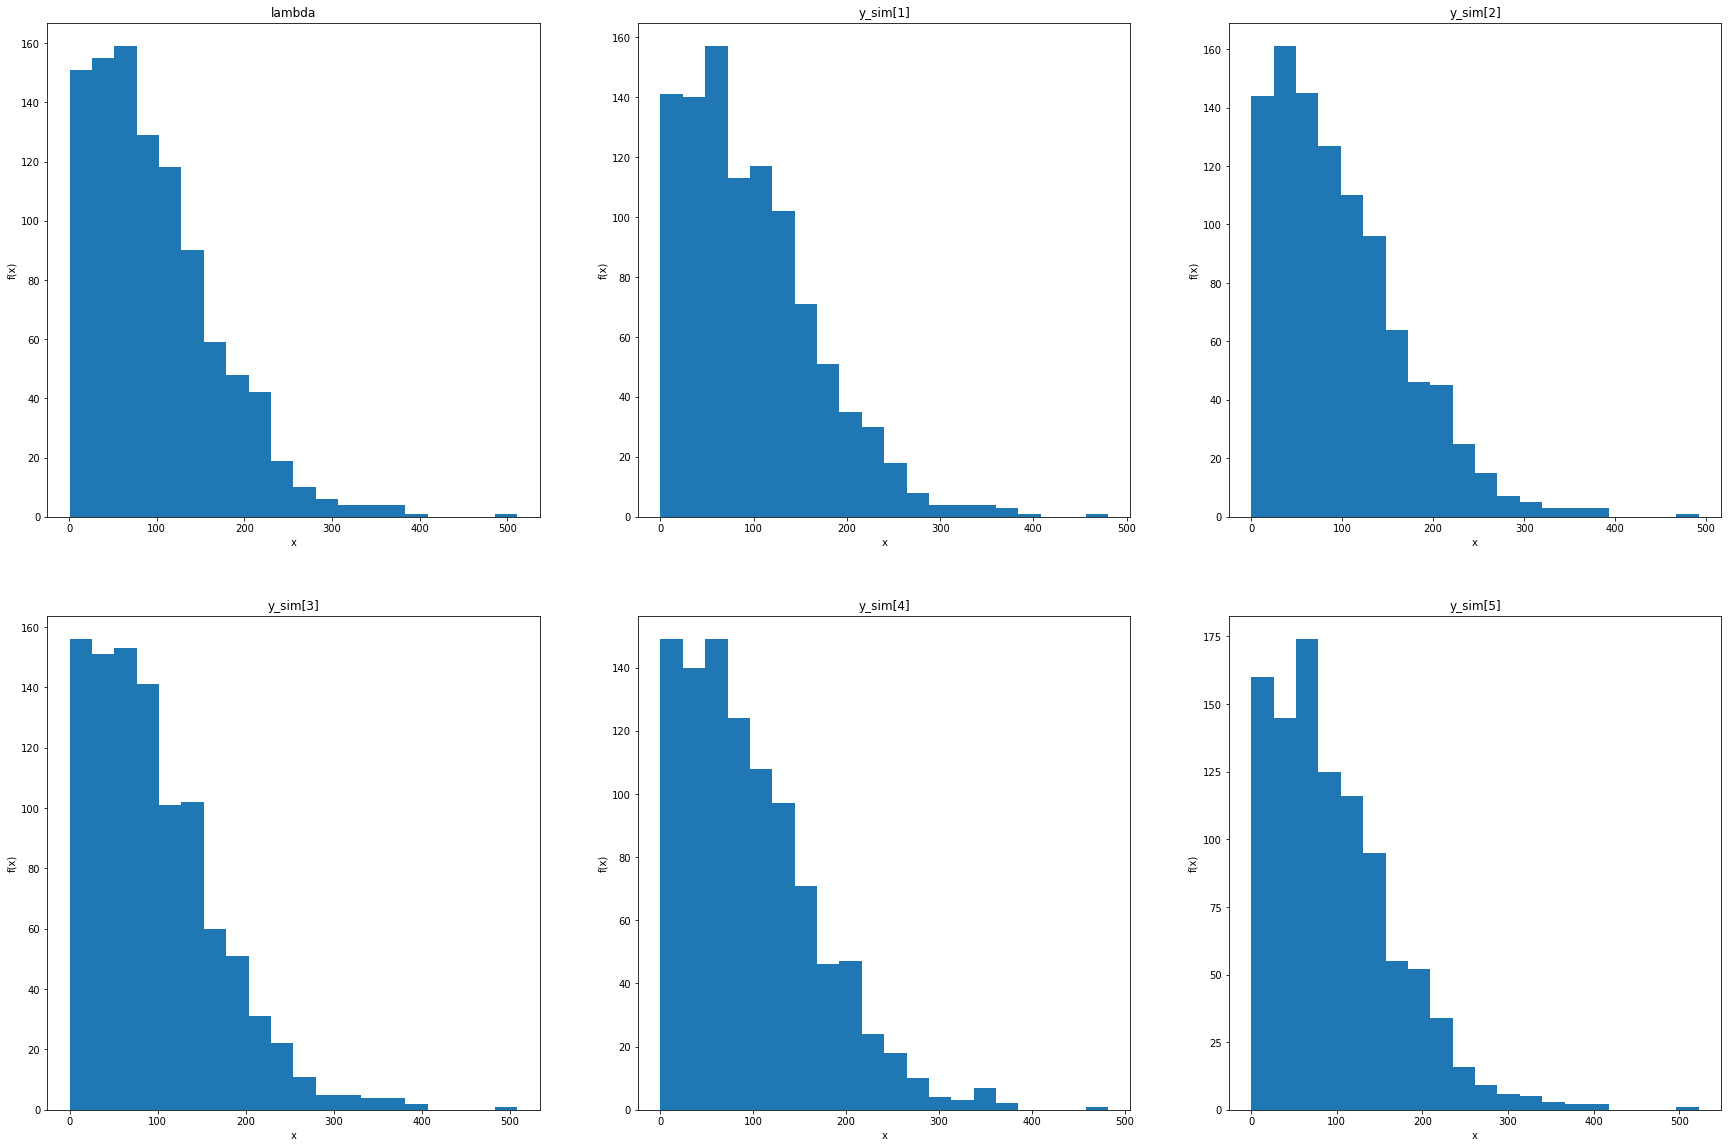

In [3]:
samples = gen_quant.sample(data={'M': F}, fixed_param=True, iter_sampling=1000, iter_warmup=0, chains=1)
df = samples.draws_pd()
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
ax = ax.flatten()
bins = 20
df["lambda"].plot.hist(bins=bins, ax=ax[0])
ax[0].set_title("lambda")
ax[0].set_xlabel("x"), ax[0].set_ylabel("f(x)")

for i in range(1, 6):
    df[f"y_sim[{i}]"].plot.hist(bins=bins, ax=ax[i])
    ax[i].set_title(f"y_sim[{i}]")
    ax[i].set_xlabel("x"), ax[i].set_ylabel("f(x)")

plt.show()

***'y_sim[i]' elements are sampled with the Poisson distribution. The plots seem to look just like in the literature.***

## Excercise 2 - Constraints on the data

***When 'y' is set to [0,2], it throws out of range errors. It should to be set to [0, 1]. This constraint is related to Bernoulli distribution.***

In [5]:
bern1 = CmdStanModel(stan_file="home/code_2.stan")
samp_bern1 = bern1.sample(data={'N': 2, 'y': [0, 1]})

INFO:cmdstanpy:compiling stan file /home/code_2.stan to exe file /home/code_2
INFO:cmdstanpy:compiled model executable: /home/code_2
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/code_2.hpp /home/code_2.stan
Warning in '/home/code_2.stan', line 3, column 4: Declaration of arrays by
    placing brackets after a variable name is deprecated and will be removed
    in Stan 2.32.0. Instead use the array keyword before the type. This can
    be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wn


INFO:cmdstanpy:CmdStan done processing.


In [7]:
bern2 = CmdStanModel(stan_file="home/code_3.stan")
samp_bern2 = bern2.sample(data={'N': 2, 'y': [0, 1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status




chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


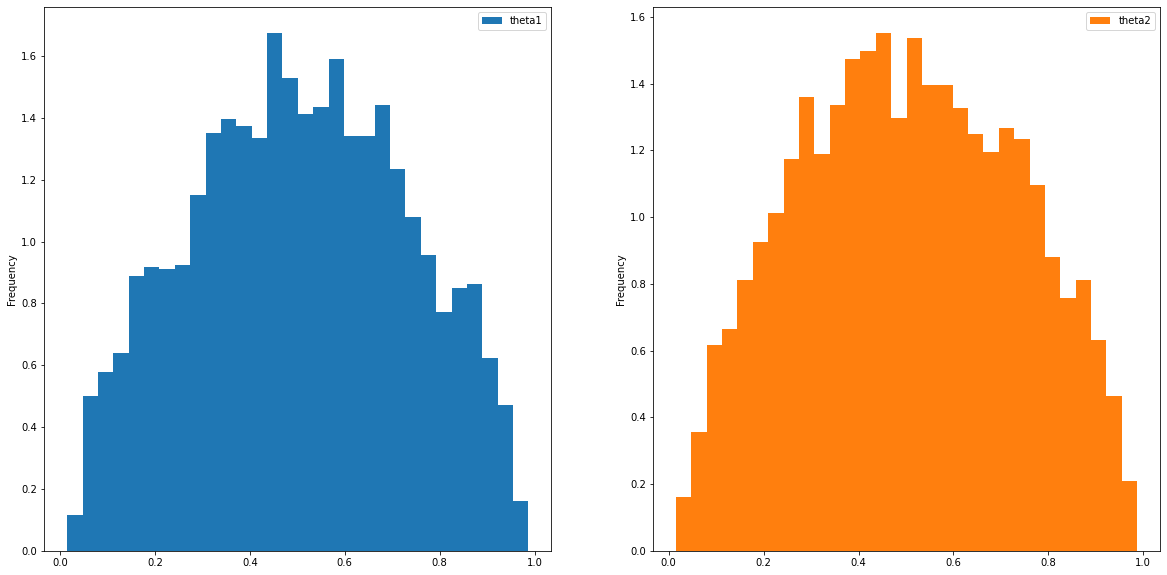

In [13]:
theta1 = samp_bern1.stan_variable("theta")
theta2 = samp_bern2.stan_variable("theta")
df = pd.DataFrame({'theta1': theta1, 'theta2': theta2})
df.plot.hist(subplots=True, bins=30, figsize=(20, 10), layout=(1, 2), density=True)
plt.show()

***Additional constraint make samples closer to the 1.***

# Excercise 3 - Constraints on the parameters

In [9]:
model_gm1 = CmdStanModel(stan_file="home/code_4.stan")
out_gamma1 = model_gm1.sample(output_dir="samples", iter_sampling=6000, iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()

INFO:cmdstanpy:compiling stan file /home/code_4.stan to exe file /home/code_4
INFO:cmdstanpy:compiled model executable: /home/code_4
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▏         | 00:00 Status
chain 1 |████▎     | 00:00 Iteration: 2800 / 7000 [ 40%]  (Sampling)

chain 1 |██████▋   | 00:00 Iteration: 4500 / 7000 [ 64%]  (Sampling)


chain 1 |████████▊ | 00:00 Iteration: 6000 / 7000 [ 85%]  (Sampling)




chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /samples/code_4-20230323030518_1.csv, /samples/code_4-20230323030518_2.csv, /samples/code_4-20230323030518_3.csv, /samples/code_4-20230323030518_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

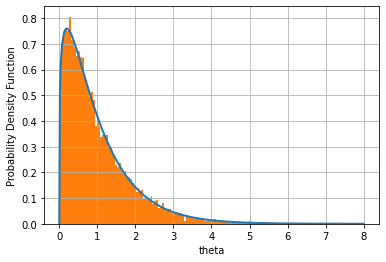

In [14]:
xs = np.linspace(0, 8, 500)
pdfs = stats.gamma.pdf(xs, 1.25, scale=1 / 1.25)
plt.plot(xs, pdfs, linewidth=2)

# Add histogram of theta samples with 160 bins
df = out_gamma1.draws_pd()
df["theta"].hist(bins=160, density=True)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


In [11]:
model_gm2 = CmdStanModel(stan_file="home/code_5.stan")
out_gamma2 = model_gm2.sample(output_dir="samples", iter_sampling=6000, iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:compiling stan file /home/code_5.stan to exe file /home/code_5
INFO:cmdstanpy:compiled model executable: /home/code_5
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▏         | 00:00 Status


chain 1 |███▌      | 00:00 Iteration: 2300 / 7000 [ 32%]  (Sampling)


chain 1 |██████    | 00:00 Iteration: 4100 / 7000 [ 58%]  (Sampling)


chain 1 |█████████ | 00:00 Iteration: 6200 / 7000 [ 88%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /samples/code_5-20230323030858_1.csv, /samples/code_5-20230323030858_2.csv, /samples/code_5-20230323030858_3.csv, /samples/code_5-20230323030858_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

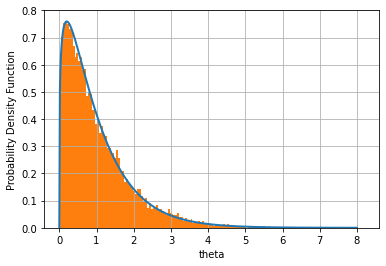

In [15]:
xs = np.linspace(0, 8, 500)
pdfs = stats.gamma.pdf(xs, 1.25, scale=1 / 1.25)
plt.plot(xs, pdfs, linewidth=2)

# Add histogram of theta samples from the second model with 160 bins
df = out_gamma2.draws_pd()
df["theta"].hist(bins=160, density=True)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


***Without constraints there were much more transitions which ended with divergences ($39.54$ %) than in case of constraints (only $0.01$ %).***

## Excercise 4 - Selection of parameters using equation solving

In [21]:
model_tune = CmdStanModel(stan_file="home/code_6.stan")
y0 = 0.5 # Initial guess for the equation solving
data = {"y_guess": [y0], "theta": [(F + L) / 2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains=1)

INFO:cmdstanpy:compiling stan file /home/code_6.stan to exe file /home/code_6
INFO:cmdstanpy:compiled model executable: /home/code_6
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/code_6.hpp /home/code_6.stan
Warning in '/home/code_6.stan', line 2, column 45: Declaration of arrays by
    placing brackets after a type is deprecated and will be removed in Stan
    2.32.0. Instead use the array keyword before the type. This can be
    changed automatically using the auto-format flag to stanc
Warning in '/home/code_6.stan', line 2, column 57: Declaration of arrays by
    placing brackets after a type is deprecated and will be removed in Stan
    2.32.0. Instead use the array keyword before the type. This can be
    changed automatically using the auto-format flag to stanc
Warning in '/home/code_6.stan', line 16, column 3: Declaration of arrays by
    placing brackets after a variable name is deprecated and will be removed
    in Stan 2.32.0. Instead use the array keyword b


INFO:cmdstanpy:CmdStan done processing.


In [22]:
tunes.draws_pd()

,lp__,accept_stat__,sigma
0,0.0,0.0,1.74701


***Sought standard deviation is equal to $1.74701$.***

# Excercise 5 - Different methods of defining models

In [25]:
model_samp_st = CmdStanModel(stan_file="home/code_7.stan")
model_log_target = CmdStanModel(stan_file="home/code_8.stan")
model_log_target_ind = CmdStanModel(stan_file="home/code_9.stan")
data = {'N': F}
seed = 6012000  # Integer. Your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data, seed=seed)
result_2 = model_log_target.sample(data=data, seed=seed)
result_3 = model_log_target_ind.sample(data=data, seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)



chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       


chain 4 |██████████| 00:01 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


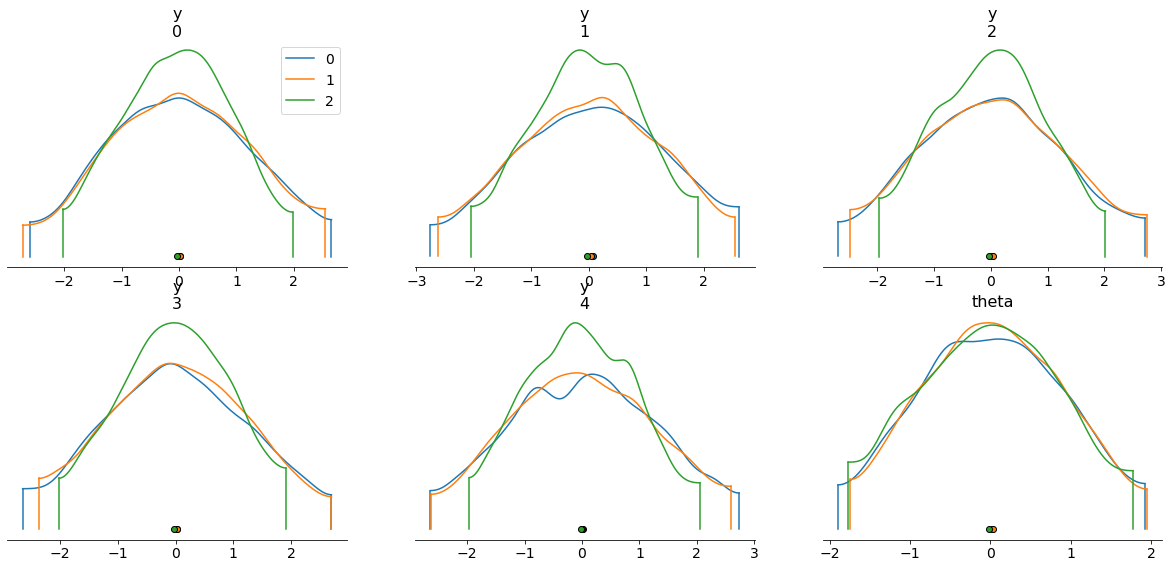

In [26]:
az.plot_density([result_1, result_2, result_3])
plt.show()

***Similar results.***

# Excercise 6 - Generated quantities post sampling

In [30]:
model_gq = CmdStanModel(stan_file="home/code_10.stan")

# Fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data, mcmc_sample=result_3)

# Investigate the output and plot histogram of mean_y variable
df = mean_of_y.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] done processing


<AxesSubplot:ylabel='Frequency'>

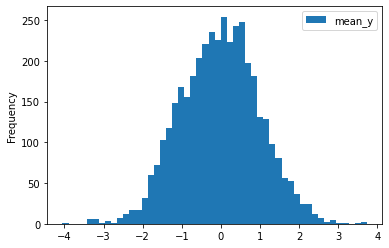

In [31]:
df.plot.hist(bins=50)


***Similar results.***